In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
import sklearn.metrics as metrics
import numpy as np
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk
import os,re, unicodedata
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import wordnet 
!pip install tqdm
from tqdm import tqdm_notebook


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("data/fake-news-data.csv")
print(df.shape)
df.head()

(51233, 3)


,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


#### Cleaning Data

In [3]:
# df.drop('Unnamed: 0', inplace = True, axis = 1)

In [4]:
df=df.replace(to_replace ="FAKE", value =0) 
df=df.replace(to_replace ="REAL", value =1) 

In [5]:
df.dropna()
df = df.reset_index(drop=True)
print(df.shape)
df.head()

(51233, 3)


,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [6]:
df["merged"]=df["title"] + " " + df["text"]

#### Splitting Data

In [7]:
x_train,x_test,y_train,y_test=train_test_split(df['merged'], df['label'], test_size=0.25, random_state=1)

#### TFIDF-Vectorizer

In [11]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7, use_idf=True)
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [12]:
tfidf_vectorizer.get_feature_names()

['00',
 '000',
 '0000',
 '000000031',
 '00000017',
 '000035',
 '00004',
 '00006',
 '000063',
 '00007',
 '0001',
 '0001pt',
 '0002',
 '000270',
 '00042',
 '0005',
 '0009',
 '000938',
 '000american',
 '000billion',
 '000dillon000',
 '000ecuador',
 '000ft',
 '000have',
 '000km',
 '000kyrgyzstan',
 '000m',
 '000oman',
 '000s',
 '000saudi',
 '000th',
 '000that',
 '000x',
 '001',
 '00106',
 '0011',
 '00155',
 '0018',
 '0019',
 '001romney',
 '001st',
 '002',
 '0020',
 '002singapore',
 '003',
 '004',
 '0040',
 '0045',
 '00458',
 '0047',
 '004s',
 '004saint',
 '005',
 '0050',
 '005380',
 '005930',
 '005s',
 '006',
 '00654',
 '00684',
 '006s',
 '007',
 '0075',
 '0076',
 '007kzman',
 '007s',
 '008',
 '008s',
 '009',
 '0099',
 '00am',
 '00c6j7capuhttps',
 '00hex',
 '00o',
 '00p',
 '00pm',
 '00pme',
 '00yecahb4d',
 '01',
 '010',
 '0100',
 '01000110',
 '01010101',
 '011',
 '0111',
 '0112',
 '012',
 '01233',
 '0129',
 '013',
 '0130',
 '013c2812c9',
 '014',
 '0149',
 '01494',
 '015',
 '01511',
 '01517

#### Passive Aggressive Classifier

In [13]:
pac=PassiveAggressiveClassifier(early_stopping=True,validation_fraction=.15,verbose=1,shuffle=True,random_state=1)
pac.fit(tfidf_train,y_train)
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

-- Epoch 1
Norm: 67.07, NNZs: 69429, Bias: -0.669725, T: 32660, Avg. loss: 0.130618
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 79.43, NNZs: 71705, Bias: -0.677924, T: 65320, Avg. loss: 0.043341
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 86.89, NNZs: 72580, Bias: -0.678507, T: 97980, Avg. loss: 0.024511
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 91.94, NNZs: 72829, Bias: -0.680936, T: 130640, Avg. loss: 0.015896
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 95.10, NNZs: 72926, Bias: -0.689921, T: 163300, Avg. loss: 0.009687
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 97.23, NNZs: 72959, Bias: -0.698868, T: 195960, Avg. loss: 0.006402
Total training time: 0.48 seconds.
Convergence after 6 epochs took 0.51 seconds
Accuracy: 97.14%


#### Confusion Matrix

In [14]:
def plot_confusion_matrix(cm, classes,normalize=False,cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.cmap=cmap
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.971
Confusion matrix, without normalization


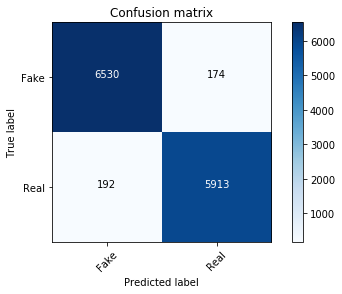

In [15]:
pred = pac.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[0,1])
plot_confusion_matrix(cm, classes=['Fake', 'Real'])